In [4]:
import numpy as np

# Regressão Linear

In [5]:
np.random.seed(42) 
m = 100  
X = 2 * np.random.rand(m, 1)  
y = 4 + 3 * X + np.random.randn(m, 1)  

In [6]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [7]:
theta_best

array([[4.21509616],
       [2.77011339]])

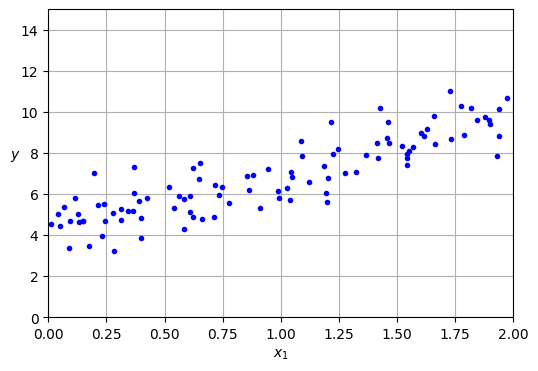

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [9]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

In [10]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

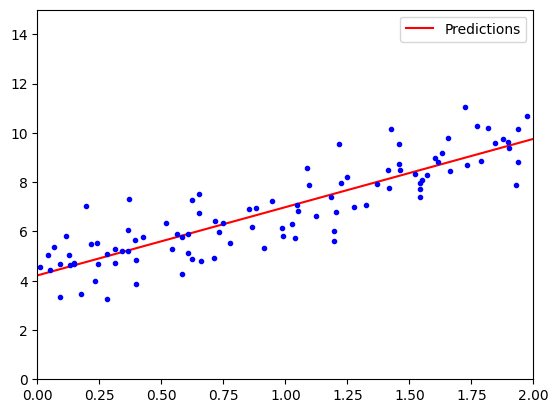

In [11]:
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [13]:
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [14]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [15]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)    # Minimos Quadrados
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [16]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

# Gradiente Descendente

## Em lote

In [17]:
eta = 0.1   # Taxa de aprendizado
n_interactions = 1000
m = 100

theta = np.random.rand(2,1)

In [18]:
for iteration in range(n_interactions):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [19]:
theta

array([[4.21509616],
       [2.77011339]])

## Estocático

In [20]:
n_epochs = 50
t0, t1 = 5, 20  # Hiperparametros

def learning_schedule(t):
    return t0 / (t1 + t)

In [21]:
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [22]:
theta

array([[4.18547367],
       [2.72951557]])

In [23]:
from sklearn.linear_model import SGDRegressor

In [24]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [25]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21647744]), array([2.77853398]))

# Regressão Polinomial

In [26]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

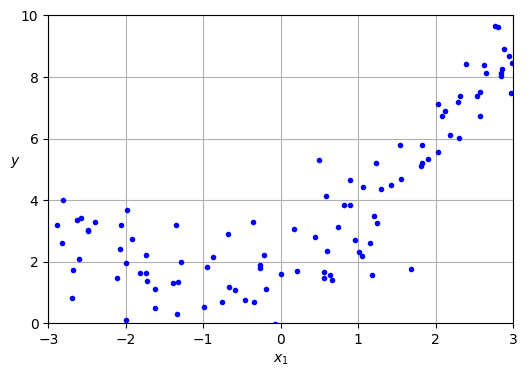

In [27]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [28]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [29]:
X_poly = poly_features.fit_transform(X)
X[0]

array([2.94407494])

In [30]:
X_poly[0]

array([2.94407494, 8.66757727])

In [31]:
lin_reg = LinearRegression()

In [32]:
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.89554823]), array([[0.95707476, 0.49025797]]))

Função Original: y = 0,5x² + x + 2 + ruido

Função Predita: y = 0,47x² + 92x + 2,12 + ruido

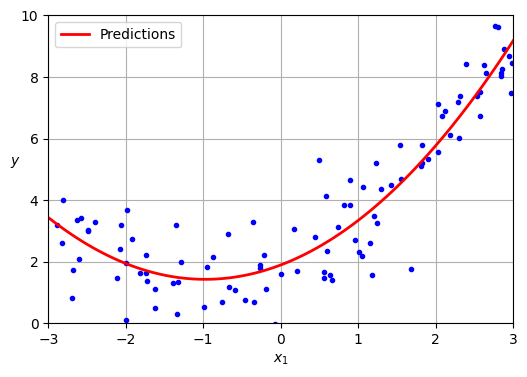

In [33]:

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Quanto maior o grau, maior a proximidade da equação verdadeira.

# Curva de Aprendizado

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='Train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='Val')
    plt.legend()


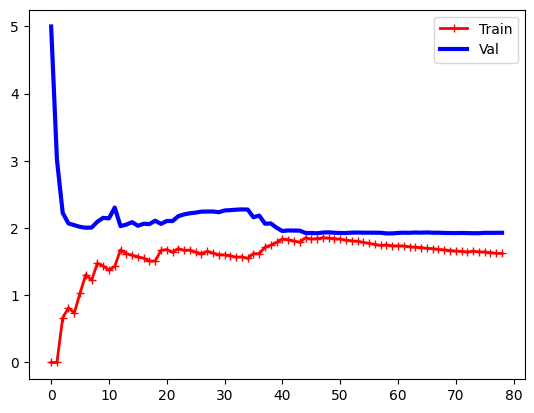

In [47]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)